In [57]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os

In [58]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [59]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [60]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =keras.utils.np_utils.to_categorical(y_test, num_classes)

In [61]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

In [12]:
#a
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    CNN = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 81s 45ms/step - loss: 1.8816 - accuracy: 0.3057 - val_loss: 1.5807 - val_accuracy: 0.4319
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5840 - accuracy: 0.4211 - val_loss: 1.4147 - val_accuracy: 0.4895
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4624 - accuracy: 0.4687 - val_loss: 1.3054 - val_accuracy: 0.5274
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3801 - accuracy: 0.5052 - val_loss: 1.2210 - val_accuracy: 0.5683
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3137 - accuracy: 0.5327 - val_loss: 1.1849 - val_accuracy: 0.5882
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2573 - accuracy: 0.5544 - val_loss: 1.0760 - val_accuracy: 0.6208
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2033 - accuracy: 0.5703 - val_loss: 1.1154 - val_accura

In [14]:
#0 layer
model0 = Sequential()
model0.add(Flatten())
model0.add(Dense(num_classes))
model0.add(Dropout(0.5))
model0.add(Activation('softmax'))
model0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
 # Fit the model on the batches generated by datagen.flow().
 
m0 = model0.fit_generator(datagen.flow(x_train, y_train,
                             batch_size=batch_size),
                epochs=epochs,
                validation_data=(x_test, y_test),
                workers=4)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


1563/1563 [==============================] - 54s 34ms/step - loss: 2.1755 - accuracy: 0.2076 - val_loss: 1.9963 - val_accuracy: 0.3064
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.1261 - accuracy: 0.2344 - val_loss: 1.9545 - val_accuracy: 0.3391
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 2.1125 - accuracy: 0.2415 - val_loss: 1.9347 - val_accuracy: 0.3431
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 2.1009 - accuracy: 0.2460 - val_loss: 1.9199 - val_accuracy: 0.3608
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.0985 - accuracy: 0.2473 - val_loss: 1.9153 - val_accuracy: 0.3581
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.0924 - accuracy: 0.2496 - val_loss: 1.9149 - val_accuracy: 0.3457
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 2.0894 - accuracy: 0.2530 - val_loss: 1.9071 - val_accura

In [17]:
#1 layer
epochs = 10

model1 = Sequential()


model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
m1 = model1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 58s 37ms/step - loss: 2.0139 - accuracy: 0.2713 - val_loss: 1.8028 - val_accuracy: 0.3698
Epoch 2/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.8791 - accuracy: 0.3224 - val_loss: 1.7269 - val_accuracy: 0.4055
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.8364 - accuracy: 0.3419 - val_loss: 1.6925 - val_accuracy: 0.4014
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.8015 - accuracy: 0.3564 - val_loss: 1.6419 - val_accuracy: 0.4254
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.7788 - accuracy: 0.3663 - val_loss: 1.6276 - val_accuracy: 0.4340
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.7589 - accuracy: 0.3692 - val_loss: 1.5966 - val_accuracy: 0.4421
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.7460 - accuracy: 0.3800 - val_loss: 1.5811 - val_accura

In [18]:
#2 layers
epochs = 10

model2 = Sequential()


model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
m2 = model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 52s 33ms/step - loss: 2.0996 - accuracy: 0.2262 - val_loss: 1.8654 - val_accuracy: 0.3415
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.9510 - accuracy: 0.2880 - val_loss: 1.7823 - val_accuracy: 0.3639
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9015 - accuracy: 0.3128 - val_loss: 1.7302 - val_accuracy: 0.3942
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8703 - accuracy: 0.3255 - val_loss: 1.7158 - val_accuracy: 0.3958
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8534 - accuracy: 0.3330 - val_loss: 1.6736 - val_accuracy: 0.4157
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.8345 - accuracy: 0.3418 - val_loss: 1.6446 - val_accuracy: 0.4224
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8200 - accuracy: 0.3477 - val_loss: 1.6339 - val_accura

In [19]:
#3 layers
epochs = 10

model3 = Sequential()

model3.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
m3 = model3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 56s 35ms/step - loss: 2.0882 - accuracy: 0.2299 - val_loss: 1.8844 - val_accuracy: 0.3257
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9458 - accuracy: 0.2912 - val_loss: 1.7855 - val_accuracy: 0.3707
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8988 - accuracy: 0.3129 - val_loss: 1.7349 - val_accuracy: 0.3869
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.8746 - accuracy: 0.3292 - val_loss: 1.7027 - val_accuracy: 0.4080
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.8534 - accuracy: 0.3370 - val_loss: 1.6784 - val_accuracy: 0.4191
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8401 - accuracy: 0.3404 - val_loss: 1.6515 - val_accuracy: 0.4229
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8272 - accuracy: 0.3463 - val_loss: 1.6516 - val_accura

In [20]:
#4 layers
epochs = 10

model4 = Sequential()

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))


model4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
m4 = model4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 54s 34ms/step - loss: 2.2152 - accuracy: 0.1533 - val_loss: 2.0394 - val_accuracy: 0.2270
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 2.0647 - accuracy: 0.2192 - val_loss: 1.9184 - val_accuracy: 0.3043
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.9993 - accuracy: 0.2501 - val_loss: 1.8872 - val_accuracy: 0.3350
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.9689 - accuracy: 0.2688 - val_loss: 1.8302 - val_accuracy: 0.3490
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.9499 - accuracy: 0.2815 - val_loss: 1.8363 - val_accuracy: 0.3590
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9318 - accuracy: 0.2885 - val_loss: 1.8543 - val_accuracy: 0.3583
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9154 - accuracy: 0.2993 - val_loss: 1.8289 - val_accura

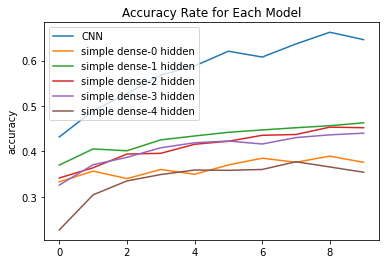

In [39]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(CNN.history['val_accuracy'])
plt.plot(m0.history['val_accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.plot(m3.history['val_accuracy'])
plt.plot(m4.history['val_accuracy'])
plt.title('Accuracy Rate for Each Model')
plt.ylabel('accuracy')
plt.legend(['CNN', 'simple dense-0 hidden','simple dense-1 hidden'
            ,'simple dense-2 hidden','simple dense-3 hidden',
           'simple dense-4 hidden'], loc='upper left')
plt.savefig('')
plt.show()


The CNN architectures use shared weights and have better performence on the accuracy rate. Hence the same set of matrix elements were updated mutiple times during the transformation and it would facilitate the process and perform better than other single layer model.


In [31]:
#b
modelSig = Sequential()
modelSig.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
modelSig.add(Activation('sigmoid'))
modelSig.add(Conv2D(32, (3, 3)))
modelSig.add(Activation('sigmoid'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(0.25))

modelSig.add(Conv2D(64, (3, 3), padding='same'))
modelSig.add(Activation('sigmoid'))
modelSig.add(Conv2D(64, (3, 3)))
modelSig.add(Activation('sigmoid'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(0.25))

modelSig.add(Flatten())
modelSig.add(Dense(512))
modelSig.add(Activation('sigmoid'))
modelSig.add(Dropout(0.5))
modelSig.add(Dense(num_classes))
modelSig.add(Activation('softmax'))

modelSig.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
Sigmoid = modelSig.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 68s 42ms/step - loss: 2.3334 - accuracy: 0.1005 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 59s 37ms/step - loss: 2.3078 - accuracy: 0.0977 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3067 - accuracy: 0.1016 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3056 - accuracy: 0.1007 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 2.3054 - accuracy: 0.1007 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 2.3054 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3049 - accuracy: 0.1006 - val_loss: 2.3031 - val_accura

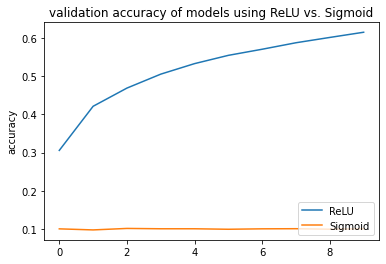

In [38]:
#summarize history for accuracy
plt.plot(CNN.history['accuracy'])
plt.plot(Sigmoid.history['accuracy'])
plt.title('validation accuracy of models using ReLU vs. Sigmoid')
plt.ylabel('accuracy')
plt.legend(['ReLU', 'Sigmoid'], loc='lower right')
plt.savefig('')
plt.show()

Relu give better results than the sigmoid elements. Sigmoid units are more subject to the gradient vanishing problem and the starting point is in one of the tails of the sigmoid whose gradient is near zero. 

In [81]:
from keras.utils import np_utils
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test =keras.utils.to_categorical(y_test, num_classes)

In [84]:
#c
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    CNN = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 62s 39ms/step - loss: 1.8766 - accuracy: 0.3128 - val_loss: 1.5898 - val_accuracy: 0.4253
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6076 - accuracy: 0.4121 - val_loss: 1.3955 - val_accuracy: 0.4966
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4849 - accuracy: 0.4635 - val_loss: 1.3336 - val_accuracy: 0.5119
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3977 - accuracy: 0.4972 - val_loss: 1.3290 - val_accuracy: 0.5167
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.3268 - accuracy: 0.5262 - val_loss: 1.1939 - val_accuracy: 0.5728
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.2680 - accuracy: 0.5486 - val_loss: 1.1442 - val_accuracy: 0.5958
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2258 - accuracy: 0.5669 - val_loss: 1.1106 - val_accura

In [85]:
#without dropout & with augmentation
epochs = 10

data_augmentation = True

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    Aug_NoDrop = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)



    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    Aug_NoDrop= model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1563/1563 [==============================] - 58s 37ms/step - loss: 1.7359 - accuracy: 0.3733 - val_loss: 1.5478 - val_accuracy: 0.4436
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4506 - accuracy: 0.4812 - val_loss: 1.2567 - val_accuracy: 0.5538
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3244 - accuracy: 0.5298 - val_loss: 1.1964 - val_accuracy: 0.5737
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2278 - accuracy: 0.5664 - val_loss: 1.2599 - val_accuracy: 0.5576
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.1543 - accuracy: 0.5938 - val_loss: 1.1453 - val_accuracy: 0.6076
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0954 - accuracy: 0.6144 - val_loss: 1.0201 - val_accuracy: 0.6423
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0461 - accuracy: 0.6322 - val_loss: 0.9768 - val_accura

In [87]:
#without augmentation & with dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


data_augmentation = False

if not data_augmentation:
    print('Not using data augmentation.')
    NoAug = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    NoAug = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.8398 - accuracy: 0.3239 - val_loss: 1.5851 - val_accuracy: 0.4144
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4958 - accuracy: 0.4591 - val_loss: 1.3666 - val_accuracy: 0.5143
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3539 - accuracy: 0.5162 - val_loss: 1.2947 - val_accuracy: 0.5435
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.2595 - accuracy: 0.5502 - val_loss: 1.2361 - val_accuracy: 0.5605
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1785 - accuracy: 0.5832 - val_loss: 1.1106 - val_accuracy: 0.6071
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1142 - accuracy: 0.6086 - val_loss: 1.0446 - val_accuracy: 0.6373
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0561 - accuracy

In [86]:
#without augmentation & without dropout
epochs = 10

data_augmentation = False

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    NoNo = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    NoNo = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6939 - accuracy: 0.3926 - val_loss: 1.4261 - val_accuracy: 0.4870
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3502 - accuracy: 0.5196 - val_loss: 1.2954 - val_accuracy: 0.5413
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2020 - accuracy: 0.5745 - val_loss: 1.2264 - val_accuracy: 0.5654
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0955 - accuracy: 0.6159 - val_loss: 1.0571 - val_accuracy: 0.6295
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0058 - accuracy: 0.6476 - val_loss: 1.1103 - val_accuracy: 0.6097
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9342 - accuracy: 0.6759 - val_loss: 1.0316 - val_accuracy: 0.6490
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8709 - accuracy

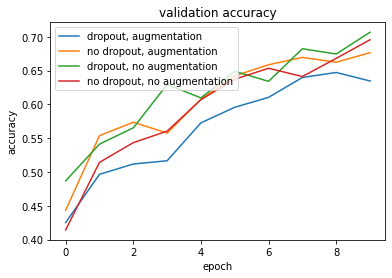

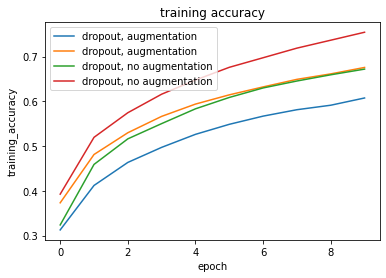

In [89]:
# summarize history for validation accuracy
plt.plot(CNN.history['val_accuracy'])
plt.plot(Aug_NoDrop.history['val_accuracy'])
plt.plot(NoNo.history['val_accuracy'])
plt.plot(NoAug.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dropout, augmentation', 'no dropout, augmentation',
           'dropout, no augmentation','no dropout, no augmentation'], loc='upper left')
plt.savefig('')
plt.show()

# summarize history for training accuracy
plt.plot(CNN.history['accuracy'])
plt.plot(Aug_NoDrop.history['accuracy'])
plt.plot(NoAug.history['accuracy'])
plt.plot(NoNo.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training_accuracy')
plt.xlabel('epoch')
plt.legend(['dropout, augmentation', 'dropout, augmentation',
           'dropout, no augmentation','dropout, no augmentation'], loc='upper left')
plt.show()

without dropout and without data augmentation learns the fastest. Data augmentation helps to improve the generalization. Dropout helps to improve generalization when there is no data augmentation.


